<a href="https://colab.research.google.com/github/Knxd3/CE888/blob/main/Lab3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [38]:
bank0 = pd.read_csv('bank-additional-full.csv', delimiter = ';')
bank1 = bank0.copy()
bank1.dropna()

del bank1['duration']
features = bank1.columns[0:len(bank1.columns)-1]
bank1.dropna()
outcome = bank1.columns[len(bank1.columns)-1]
bank1 = bank1.apply(LabelEncoder().fit_transform)

bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0


ratio yes to no:  11.27


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


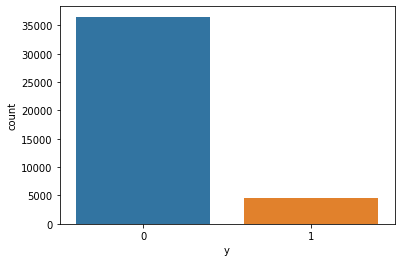

In [39]:
#imbalance - unequal distribution of classes
sns.countplot(bank1['y'])

imb = bank1['y'].value_counts()
print ('ratio yes to no: ', round(imb[1]/(imb[0]+imb[1])*100,2))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(bank1[features], bank1[outcome], test_size = 0.2, random_state = 50, stratify = bank1[outcome])

strf = y_train.value_counts()
# stratification check
print(strf[1]/(strf[0]+strf[1]))

0.11265553869499241


In [41]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

results = dummy.predict(X_test)

print(mae(y_test, results))


0.19798494780286477


In [60]:
model = RandomForestClassifier(n_estimators= 400, max_depth = 8, random_state = 60)

#scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = make_scorer(f1))

model.fit(X_train, y_train)
score_1 = model.predict(X_test) 
print(f1(y_test, score_1))

importances = model.feature_importances_

print(importances)
print(features)

0.346031746031746
[0.04228574 0.01634057 0.00811171 0.01566808 0.00499107 0.00563079
 0.00506269 0.01694743 0.03938386 0.0214011  0.01588937 0.11986128
 0.01581106 0.09533706 0.07098414 0.04734073 0.07656872 0.18760628
 0.19477834]
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


In [49]:
print(round(sum(scores)/(len(scores)),5))

0.33185
